# Hello everyone its day 17 Today we have Task of Web scrapping 

 I'm going to do web scraping of Website "https://www.espncricinfo.com/" Page.ESPNcricinfo is a sports news website exclusively for the game of cricket. The site features news, articles, live coverage of cricket matches, and StatsGuru, a database of historical matches and players from the 18th century to the present.I'm going to scrap "ICC ODI Championship" Table and "ICC Twenty20 Rankings" From Ranking Section.

In [69]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
url=requests.get("https://www.espncricinfo.com/rankings/content/page/211271.html")
url.ok

True

In [4]:
url.headers['Content-Type']

'text/html; charset=UTF-8'

In [5]:
content=url.content

In [6]:
content

b'\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<!-- hostname: web03, edition-view: espncricinfo-en-in, country: in, cluster: ind, created: 2023-01-27 02:38:46 -->\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/" >\n<head>\n <script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>\n <meta name="google-site-verification" content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" />\n <meta\n        name="viewport"\n        content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"\n      />\n <title>ICC Cricket Rankings - Current ICC Rankings for Tests, ODIs, T20 Cricket | ESPNcricinfo.com</title>\n <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\n <meta name="keywords" content="cricket rankings, icc cricket ran

In [8]:
read=BeautifulSoup(content,'html.parser')

In [9]:
read


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<!-- hostname: web03, edition-view: espncricinfo-en-in, country: in, cluster: ind, created: 2023-01-27 02:38:46 -->
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://developers.facebook.com/schema/" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
<meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<title>ICC Cricket Rankings - Current ICC Rankings for Tests, ODIs, T20 Cricket | ESPNcricinfo.com</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="cricket rankings, icc cricket rankings, cricket world ranking, icc records" name="keywords"/>
<meta content="Checkout the comprehensive ICC 

In [10]:
url

<Response [200]>

In [11]:
read.div

<div class="nav_inner" id="nav_inner">
<div class="nav_btn" id="nav_btn">
<span class="back-icon-svg">
<svg id="Capa_1" style="enable-background:new 0 0 31.494 31.494;" version="1.1" viewbox="0 0 31.494 31.494" x="0px" xml:space="preserve" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" y="0px"> <path d="M10.273,5.009c0.444-0.444,1.143-0.444,1.587,0c0.429,0.429,0.429,1.143,0,1.571l-8.047,8.047h26.554 c0.619,0,1.127,0.492,1.127,1.111c0,0.619-0.508,1.127-1.127,1.127H3.813l8.047,8.032c0.429,0.444,0.429,1.159,0,1.587 c-0.444,0.444-1.143,0.444-1.587,0l-9.952-9.952c-0.429-0.429-0.429-1.143,0-1.571L10.273,5.009z" style="fill:#FFFFFF;"></path> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> <g> </g> </svg>
</span>
</div>
<div class="ci_logo" id="ci_logo">
<a href="/">
<img src="https://www.espncricinfo.com/static/images/logo.png"/>
<span class="logo_txt">ESPN Cricinfo</span>
</a>
</div>


In [12]:
div=read.find_all("div",class_= "ciPhotoContainer")

In [13]:
len(div)

1

In [17]:
div[0].h3.text

'ICC Test Rankings'

In [22]:
cric_format=div[0].find_all('h3')
cric_format

[<h3>ICC Test Rankings</h3>,
 <h3>ICC ODI Rankings</h3>,
 <h3>ICC Twenty20 Rankings</h3>,
 <h3>ICC Women's ODI Team Rankings</h3>,
 <h3>ICC Women's T20 Team Rankings</h3>]

In [23]:
##remove h3 tags
for i in cric_format:
    print(i.text)

ICC Test Rankings
ICC ODI Rankings
ICC Twenty20 Rankings
ICC Women's ODI Team Rankings
ICC Women's T20 Team Rankings


In [24]:
##save test tabel to give attribute table 
test_tabel=read.table
test_tabel

<table class="StoryengineTable">
<caption>08 January 2023</caption>
<tr class="head">
<th class="left">Pos</th>
<th class="left">Team</th>
<th class="left">Matches</th>
<th class="left">Points</th>
<th class="left">Rating</th>
</tr>
<tr>
<td class="left">1</td>
<td class="left">Australia</td>
<td class="left">29</td>
<td class="left">3668</td>
<td class="left">126</td>
</tr>
<tr>
<td class="left">2</td>
<td class="left">India</td>
<td class="left">32</td>
<td class="left">3690</td>
<td class="left">115</td>
</tr>
<tr>
<td class="left">3</td>
<td class="left">England</td>
<td class="left">47</td>
<td class="left">5017</td>
<td class="left">107</td>
</tr>
<tr>
<td class="left">4</td>
<td class="left">South Africa</td>
<td class="left">29</td>
<td class="left">2952</td>
<td class="left">102</td>
</tr>
<tr>
<td class="left">5</td>
<td class="left">New Zealand</td>
<td class="left">30</td>
<td class="left">2965</td>
<td class="left">99</td>
</tr>
<tr>
<td class="left">6</td>
<td class="left

In [28]:
all_tabel=read.find_all("table",  class_="StoryengineTable")
all_tabel

[<table class="StoryengineTable">
 <caption>08 January 2023</caption>
 <tr class="head">
 <th class="left">Pos</th>
 <th class="left">Team</th>
 <th class="left">Matches</th>
 <th class="left">Points</th>
 <th class="left">Rating</th>
 </tr>
 <tr>
 <td class="left">1</td>
 <td class="left">Australia</td>
 <td class="left">29</td>
 <td class="left">3668</td>
 <td class="left">126</td>
 </tr>
 <tr>
 <td class="left">2</td>
 <td class="left">India</td>
 <td class="left">32</td>
 <td class="left">3690</td>
 <td class="left">115</td>
 </tr>
 <tr>
 <td class="left">3</td>
 <td class="left">England</td>
 <td class="left">47</td>
 <td class="left">5017</td>
 <td class="left">107</td>
 </tr>
 <tr>
 <td class="left">4</td>
 <td class="left">South Africa</td>
 <td class="left">29</td>
 <td class="left">2952</td>
 <td class="left">102</td>
 </tr>
 <tr>
 <td class="left">5</td>
 <td class="left">New Zealand</td>
 <td class="left">30</td>
 <td class="left">2965</td>
 <td class="left">99</td>
 </tr>


In [29]:
len(all_tabel)

5

In [30]:
odis=all_tabel[1]

In [31]:
odis

<table class="StoryengineTable">
<caption>24 January 2023</caption>
<tr class="head">
<th class="left">Pos</th>
<th class="left">Team</th>
<th class="left">Matches</th>
<th class="left">Points</th>
<th class="left">Rating</th>
</tr>
<tr>
<td class="left">1</td>
<td class="left">India</td>
<td class="left">44</td>
<td class="left">5010</td>
<td class="left">114</td>
</tr>
<tr>
<td class="left">2</td>
<td class="left">England</td>
<td class="left">30</td>
<td class="left">3400</td>
<td class="left">113</td>
</tr>
<tr>
<td class="left">3</td>
<td class="left">Australia</td>
<td class="left">32</td>
<td class="left">3572</td>
<td class="left">112</td>
</tr>
<tr>
<td class="left">4</td>
<td class="left">New Zealand</td>
<td class="left">29</td>
<td class="left">3229</td>
<td class="left">111</td>
</tr>
<tr>
<td class="left">5</td>
<td class="left">Pakistan</td>
<td class="left">25</td>
<td class="left">2649</td>
<td class="left">106</td>
</tr>
<tr>
<td class="left">6</td>
<td class="left">S

In [32]:
#find_column_name_in_th
col=[]
for i in odis.find_all('th'):
    col.append(i.text)

In [33]:
col

['Pos', 'Team', 'Matches', 'Points', 'Rating']

In [34]:
'''td tag -> stand for table data.
th tag -> stand for table header.
tr tag -> stand for table row.'''

tabel_data=odis.find_all('td')
tabel_data

[<td class="left">1</td>,
 <td class="left">India</td>,
 <td class="left">44</td>,
 <td class="left">5010</td>,
 <td class="left">114</td>,
 <td class="left">2</td>,
 <td class="left">England</td>,
 <td class="left">30</td>,
 <td class="left">3400</td>,
 <td class="left">113</td>,
 <td class="left">3</td>,
 <td class="left">Australia</td>,
 <td class="left">32</td>,
 <td class="left">3572</td>,
 <td class="left">112</td>,
 <td class="left">4</td>,
 <td class="left">New Zealand</td>,
 <td class="left">29</td>,
 <td class="left">3229</td>,
 <td class="left">111</td>,
 <td class="left">5</td>,
 <td class="left">Pakistan</td>,
 <td class="left">25</td>,
 <td class="left">2649</td>,
 <td class="left">106</td>,
 <td class="left">6</td>,
 <td class="left">South Africa</td>,
 <td class="left">24</td>,
 <td class="left">2392</td>,
 <td class="left">100</td>,
 <td class="left">7</td>,
 <td class="left">Bangladesh</td>,
 <td class="left">33</td>,
 <td class="left">3129</td>,
 <td class="left">95<

In [36]:
table_list=[]
start=0
end=5

for i in range(20):
    Pos,Team, Matches,Points,Rating = tabel_data[start:end]
    table_list.append([Pos.text,Team.text, Matches.text,Points.text,Rating.text])
    start += 5
    end +=5

In [37]:
table_list

[['1', 'India', '44', '5010', '114'],
 ['2', 'England', '30', '3400', '113'],
 ['3', 'Australia', '32', '3572', '112'],
 ['4', 'New Zealand', '29', '3229', '111'],
 ['5', 'Pakistan', '25', '2649', '106'],
 ['6', 'South Africa', '24', '2392', '100'],
 ['7', 'Bangladesh', '33', '3129', '95'],
 ['8', 'Sri Lanka', '34', '2976', '88'],
 ['9', 'Afghanistan', '20', '1419', '71'],
 ['10', 'West Indies', '41', '2902', '71'],
 ['11', 'Ireland', '25', '1300', '52'],
 ['12', 'Scotland', '31', '1459', '47'],
 ['13', 'Zimbabwe', '28', '1201', '43'],
 ['14', 'Namibia', '26', '971', '37'],
 ['15', 'Netherlands', '21', '673', '32'],
 ['16', 'Oman', '30', '919', '31'],
 ['17', 'UAE', '25', '693', '28'],
 ['18', 'USA', '31', '821', '26'],
 ['19', 'Nepal', '28', '456', '16'],
 ['20', 'PNG', '30', '128', '4']]

In [40]:
date=odis.caption.text

In [41]:
date

'24 January 2023'

In [43]:
odi_ranking=pd.DataFrame(table_list,columns=col)
odi_ranking.name= '24 January 2023'

In [44]:
print(odi_ranking.name)
odi_ranking.head()

24 January 2023


Pos         Team Matches Points Rating
0   1        India      44   5010    114
1   2      England      30   3400    113
2   3    Australia      32   3572    112
3   4  New Zealand      29   3229    111
4   5     Pakistan      25   2649    106

In [45]:
odi_ranking.shape

(20, 5)

In [46]:
t_20=all_tabel[2]
t_20

<table class="StoryengineTable">
<caption>15 January 2023</caption>
<tr class="head">
<th class="left">Pos</th>
<th class="left">Team</th>
<th class="left">Matches</th>
<th class="left">Points</th>
<th class="left">Rating</th>
</tr>
<tr>
<td class="left">1</td>
<td class="left">India</td>
<td class="left">66</td>
<td class="left">17636</td>
<td class="left">267</td>
</tr>
<tr>
<td class="left">2</td>
<td class="left">England</td>
<td class="left">49</td>
<td class="left">13029</td>
<td class="left">266</td>
</tr>
<tr>
<td class="left">3</td>
<td class="left">Pakistan</td>
<td class="left">55</td>
<td class="left">14168</td>
<td class="left">258</td>
</tr>
<tr>
<td class="left">4</td>
<td class="left">South Africa</td>
<td class="left">41</td>
<td class="left">10510</td>
<td class="left">256</td>
</tr>
<tr>
<td class="left">5</td>
<td class="left">New Zealand</td>
<td class="left">50</td>
<td class="left">12621</td>
<td class="left">252</td>
</tr>
<tr>
<td class="left">6</td>
<td class=

In [47]:
#find_column_name_in_th
col_20=[]
for i in odis.find_all('th'):
    col_20.append(i.text)

In [48]:
col_20

['Pos', 'Team', 'Matches', 'Points', 'Rating']

In [50]:
table_data1=t_20.find_all("td")
table_data1

[<td class="left">1</td>,
 <td class="left">India</td>,
 <td class="left">66</td>,
 <td class="left">17636</td>,
 <td class="left">267</td>,
 <td class="left">2</td>,
 <td class="left">England</td>,
 <td class="left">49</td>,
 <td class="left">13029</td>,
 <td class="left">266</td>,
 <td class="left">3</td>,
 <td class="left">Pakistan</td>,
 <td class="left">55</td>,
 <td class="left">14168</td>,
 <td class="left">258</td>,
 <td class="left">4</td>,
 <td class="left">South Africa</td>,
 <td class="left">41</td>,
 <td class="left">10510</td>,
 <td class="left">256</td>,
 <td class="left">5</td>,
 <td class="left">New Zealand</td>,
 <td class="left">50</td>,
 <td class="left">12621</td>,
 <td class="left">252</td>,
 <td class="left">6</td>,
 <td class="left">Australia</td>,
 <td class="left">47</td>,
 <td class="left">11784</td>,
 <td class="left">251</td>,
 <td class="left">7</td>,
 <td class="left">West Indies</td>,
 <td class="left">51</td>,
 <td class="left">12039</td>,
 <td class="l

In [51]:
table_list1 = []
start = 0
end = 5

for i in range(85):
    Pos,Team, Matches,Points,Rating = table_data1[start:end]
    table_list1.append([Pos.text,Team.text, Matches.text,Points.text,Rating.text])
    start += 5
    end +=5

In [52]:
table_list1

[['1', 'India', '66', '17636', '267'],
 ['2', 'England', '49', '13029', '266'],
 ['3', 'Pakistan', '55', '14168', '258'],
 ['4', 'South Africa', '41', '10510', '256'],
 ['5', 'New Zealand', '50', '12621', '252'],
 ['6', 'Australia', '47', '11784', '251'],
 ['7', 'West Indies', '51', '12039', '236'],
 ['8', 'Sri Lanka', '53', '12485', '236'],
 ['9', 'Bangladesh', '51', '11328', '222'],
 ['10', 'Afghanistan', '30', '6512', '217'],
 ['11', 'Zimbabwe', '49', '9597', '196'],
 ['12', 'Ireland', '57', '10818', '190'],
 ['13', 'UAE', '29', '5298', '183'],
 ['14', 'Namibia', '32', '5846', '183'],
 ['15', 'Scotland', '24', '4373', '182'],
 ['16', 'Nepal', '30', '5387', '180'],
 ['17', 'Netherlands', '32', '5668', '177'],
 ['18', 'Oman', '26', '4090', '157'],
 ['19', 'PNG', '24', '3495', '146'],
 ['20', 'Canada', '24', '3297', '137'],
 ['21', 'Hong Kong', '20', '2555', '128'],
 ['22', 'Qatar', '17', '2169', '128'],
 ['23', 'Jersey', '23', '2924', '127'],
 ['24', 'Uganda', '46', '5648', '123'],
 [

In [53]:
update_date=t_20.caption.text
update_date

'15 January 2023'

In [54]:
t20_ranking=pd.DataFrame(table_list1,columns=col_20)
t20_ranking

Pos          Team Matches Points Rating
0    1         India      66  17636    267
1    2       England      49  13029    266
2    3      Pakistan      55  14168    258
3    4  South Africa      41  10510    256
4    5   New Zealand      50  12621    252
..  ..           ...     ...    ...    ...
80  81      Thailand      10      0      0
81  82      Eswatini      18      0      0
82  83    Seychelles      10      0      0
83  84       Estonia      12      0      0
84  85      Cameroon      13      0      0

[85 rows x 5 columns]

In [55]:
odi_ranking

Pos          Team Matches Points Rating
0    1         India      44   5010    114
1    2       England      30   3400    113
2    3     Australia      32   3572    112
3    4   New Zealand      29   3229    111
4    5      Pakistan      25   2649    106
5    6  South Africa      24   2392    100
6    7    Bangladesh      33   3129     95
7    8     Sri Lanka      34   2976     88
8    9   Afghanistan      20   1419     71
9   10   West Indies      41   2902     71
10  11       Ireland      25   1300     52
11  12      Scotland      31   1459     47
12  13      Zimbabwe      28   1201     43
13  14       Namibia      26    971     37
14  15   Netherlands      21    673     32
15  16          Oman      30    919     31
16  17           UAE      25    693     28
17  18           USA      31    821     26
18  19         Nepal      28    456     16
19  20           PNG      30    128      4

# ANALYSIS

In [65]:
##ching dtype
odi_ranking['Matches']=odi_ranking['Matches'].astype('int64')
odi_ranking['Points']=odi_ranking['Points'].astype('int64')
odi_ranking['Rating']=odi_ranking['Rating'].astype('int64')
t20_ranking['Matches']=t20_ranking['Matches'].astype('int64')
t20_ranking['Points']=t20_ranking['Points'].astype('int64')
t20_ranking['Rating']=t20_ranking['Rating'].astype('int64')

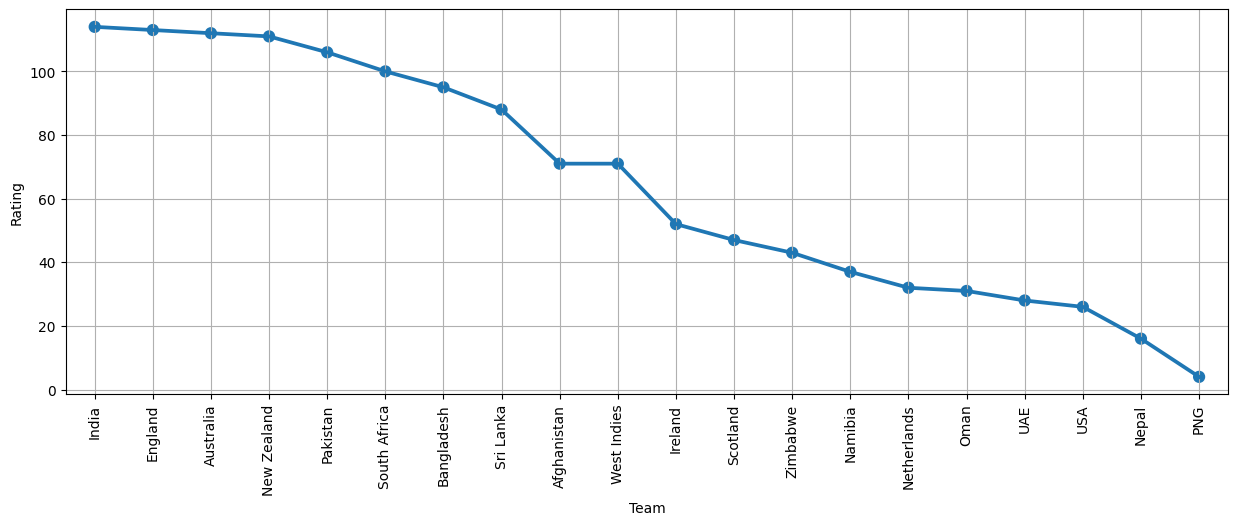

In [80]:
# rating of odi 
plt.figure(figsize=(15,5))
sns.pointplot(data=odi_ranking,x='Team',y='Rating')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

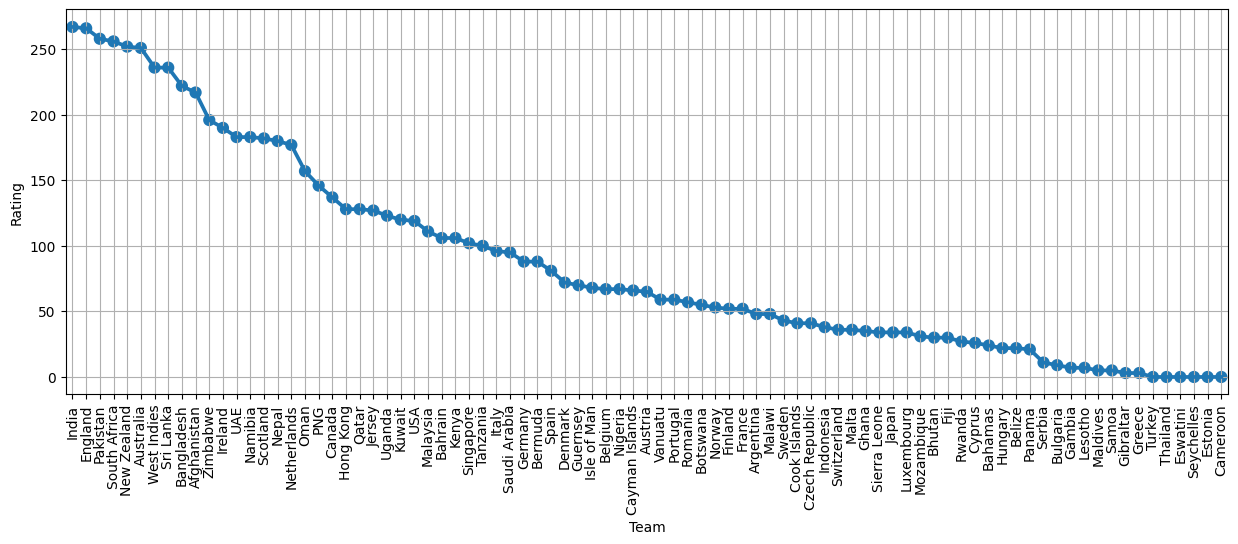

In [81]:
# rating of odi 
plt.figure(figsize=(15,5))
sns.pointplot(data=t20_ranking,x='Team',y='Rating')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

In [83]:
odi_ranking.to_csv('odi_ranking')
t20_ranking.to_csv('t20_ranking')